In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fertilizer Prediction.csv")

In [3]:
df.head()

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Maize,37,0,0,Urea
1,29,52,45,Sugarcane,12,0,36,DAP
2,34,65,62,Cotton,7,9,30,14-35-14
3,32,62,34,Tobacco,22,0,20,28-28
4,28,54,46,Paddy,35,0,0,Urea


In [4]:
df.shape

(99, 8)

In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Crop Type        99 non-null     object
 4   Nitrogen         99 non-null     int64 
 5   Potassium        99 non-null     int64 
 6   Phosphorous      99 non-null     int64 
 7   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(2)
memory usage: 6.3+ KB


In [7]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

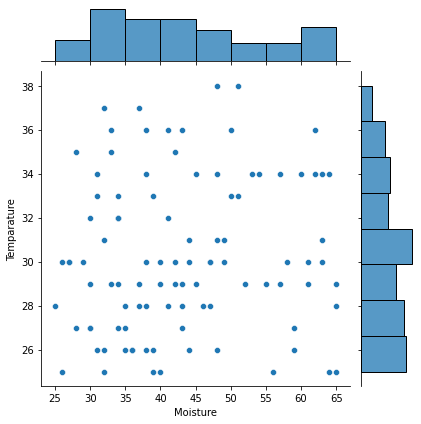

In [8]:
sns.jointplot(x='Moisture', y='Temparature', data=df)

(array([ 7., 12., 14., 14., 13., 10.,  7.,  4.,  6., 12.]),
 array([25., 29., 33., 37., 41., 45., 49., 53., 57., 61., 65.]),
 <BarContainer object of 10 artists>)

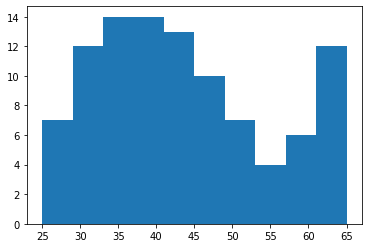

In [9]:
plt.hist(x='Moisture', data=df)

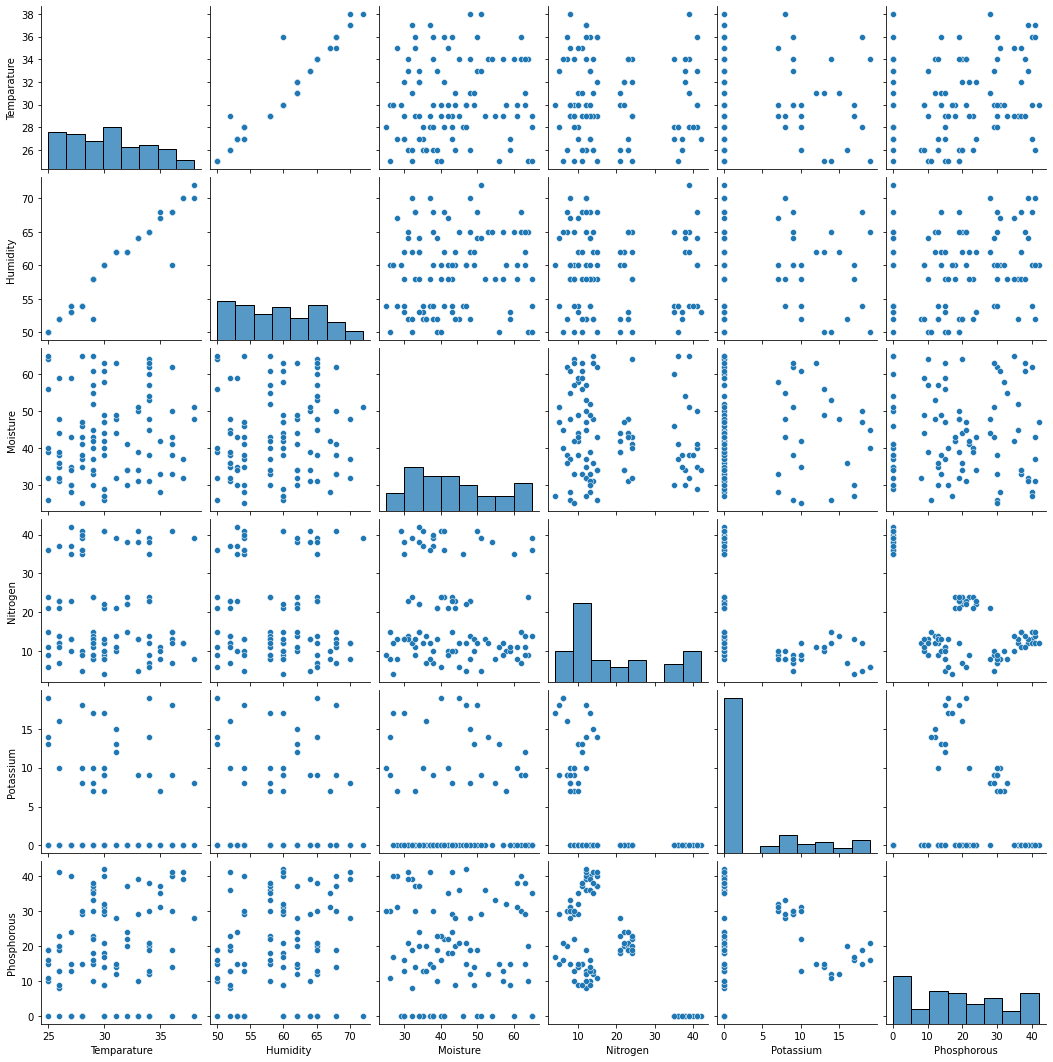

In [10]:
sns.pairplot(df)

In [11]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [12]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [13]:
df['Crop Type'] = df['Crop Type'].map({'Maize':0, 'Sugarcane':1, 'Cotton':2, 'Tobacco':3, 'Paddy':4, 'Barley':5,
       'Wheat':6, 'Millets':7, 'Oil seeds':8, 'Pulses':9, 'Ground Nuts':10})


In [14]:
df.head()

,Temparature,Humidity,Moisture,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0,37,0,0,Urea
1,29,52,45,1,12,0,36,DAP
2,34,65,62,2,7,9,30,14-35-14
3,32,62,34,3,22,0,20,28-28
4,28,54,46,4,35,0,0,Urea


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['Fertilizer Name'], axis=1)
y = df[['Fertilizer Name']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pred = model.predict(X_test)

In [21]:
pred

array(['Urea', '17-17-17', '17-17-17', 'DAP', '14-35-14', 'Urea', 'Urea',
       '14-35-14', '17-17-17', 'DAP', '20-20', 'Urea', 'DAP', '10-26-26',
       '20-20', '14-35-14', 'DAP', '20-20', '10-26-26', '14-35-14',
       '20-20', '28-28', '14-35-14', 'Urea', 'Urea', 'Urea', '28-28',
       '28-28', '14-35-14', 'DAP'], dtype=object)

In [22]:
da = [[28, 54, 46, 2,35, 0, 0 ]]
prediction = model.predict(da)
print(prediction)

['Urea']


In [23]:
dict = {'Maize':0, 'Sugarcane':1, 'Cotton':2, 'Tobacco':3, 'Paddy':4, 'Barley':5,
       'Wheat':6, 'Millets':7, 'Oil seeds':8, 'Pulses':9, 'Ground Nuts':10}
dat = [[40,97,70,'Ground Nuts',35,0,24]]

dat

[[40, 97, 70, 'Ground Nuts', 35, 0, 24]]

In [24]:
if dat[0][3] == 'Maize':
    dat[0][3] = 0
elif dat[0][3] == 'Sugarcane':
    dat[0][3] = 1
elif dat[0][3] == 'Cotton':
    dat[0][3] = 2
elif dat[0][3] == 'Tobacco':
    dat[0][3] = 3
elif dat[0][3] == 'Paddy':
    dat[0][3] = 4
elif dat[0][3] == 'Barley':
    dat[0][3] = 5
elif dat[0][3] == 'Wheat':
    dat[0][3] = 6
elif dat[0][3] == 'Millets':
    dat[0][3] = 7
elif dat[0][3] == 'Oil seeds':
    dat[0][3] = 8
elif dat[0][3] == 'Pulses':
    dat[0][3] = 9
elif dat[0][3] == 'Ground Nuts':
    dat[0][3] = 10
    
dat

[[40, 97, 70, 10, 35, 0, 24]]

In [25]:
prediction = model.predict(dat)
print(prediction)

['28-28']


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         6
    17-17-17       1.00      1.00      1.00         3
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

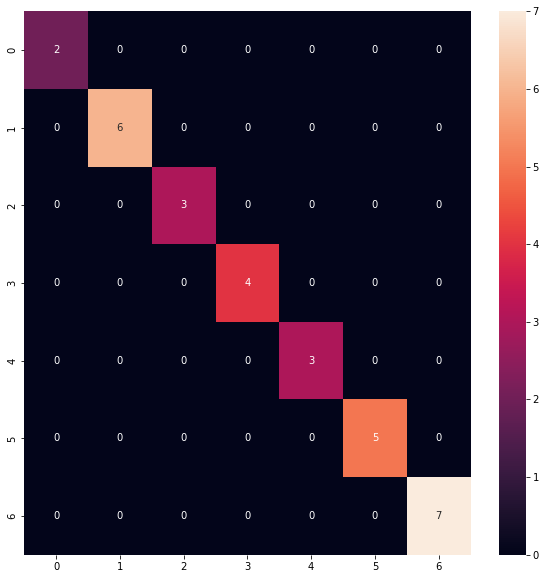

In [28]:
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, pred)
cr = classification_report(y_test, pred)
sns.heatmap(cm, annot = True)

In [29]:
print(confusion_matrix(y_test, pred))

[[2 0 0 0 0 0 0]
 [0 6 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 7]]


In [30]:
import pickle
pickle.dump(model, open('fertilizer.pkl',"wb"))
pickle.dump(model, open('vector.pkl',"wb"))